In [14]:
from __future__ import division

import numpy as np
import os
from glob import glob

from PIL import Image
from copy import deepcopy

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors

%matplotlib inline
from scipy.misc import imread, imresize

import pandas as pd

from scipy.stats import norm
import sklearn
import nilearn

In [18]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps

print('Atlas ROIs are located at: %s' % atlas_filename)

# Harvard Oxford Atlasf
harvard_oxford = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')
harvard_oxford_sub = datasets.fetch_atlas_harvard_oxford('sub-prob-2mm')

Atlas ROIs are located at: /home/jefan/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz


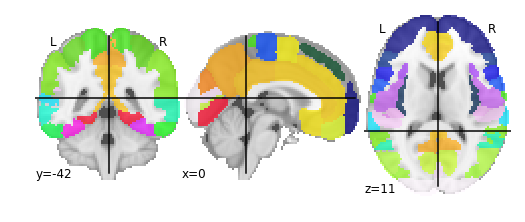

In [70]:
from nilearn import plotting
cmap = plt.get_cmap('viridis')
fig = plotting.plot_roi(atlas_filename)
plotting.show()
fig.savefig('./plots/harvard_oxford_atlas_allROIs.pdf')

In [143]:
from nilearn import image
im = image.load_img(atlas_filename)
array = im.get_data()

# how did you define anatomical ROIs?
V1_vals = [48]
LOC_vals = [23]
IT_vals = [14,15,16]
fusiform_vals = [38,39,40]
parahippo_vals = [34,35]

ROI_vals = [V1_vals, LOC_vals, IT_vals, fusiform_vals, parahippo_vals]

# blank template
template = np.zeros(array.shape)

# for each ROI, paint with distinct color
for i,roi in enumerate(ROI_vals):    
    ix = np.isin(array, roi)
    inds = np.where(ix)
    template[inds] = i + 1     

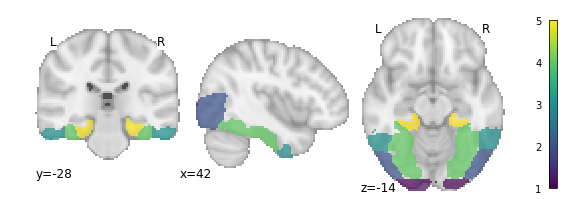

In [152]:
from nilearn.image import new_img_like
visual_masked = new_img_like(atlas_filename, template)
fig = plotting.plot_roi(visual_masked,
                       cut_coords=(42,-28,-14),
                       colorbar=True,
                       cmap='viridis',
                       draw_cross=False)
plotting.show()
fig.savefig('./plots/harvard_oxford_atlas_42_-28_-14.pdf')

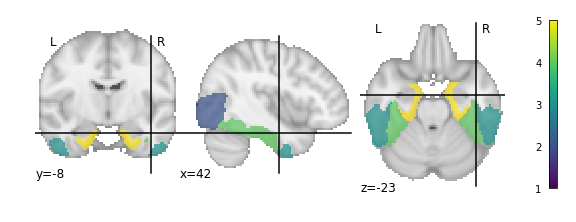

In [151]:
from nilearn.image import new_img_like
visual_masked = new_img_like(atlas_filename, template)
fig = plotting.plot_roi(visual_masked,
                       cut_coords=(42,-8,-23),
                       colorbar=True,
                       cmap='viridis')
plotting.show()
fig.savefig('./plots/harvard_oxford_atlas_42_-8_-23.pdf')